In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
train_targets = df_train['label']
train_inputs = df_train.drop(['label'], axis=1)

In [4]:
np.savez('TF_train', inputs=train_inputs, targets=train_targets)

In [5]:
np.savez('TF_test', inputs=df_test)

## PCA using Sklearn

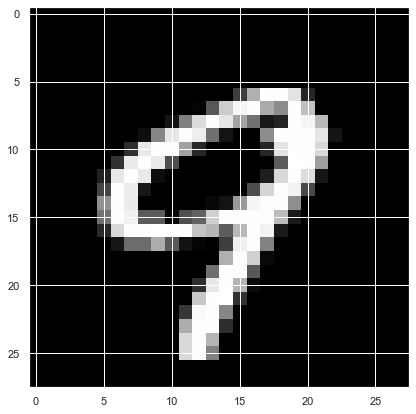

9


In [6]:
plt.figure(figsize=(7,7))
idx = 100

grid_data = train_inputs.iloc[idx].values.reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(train_targets[idx])

In [7]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(train_inputs)
print(standardized_data.shape)

(42000, 784)


In [8]:
from sklearn import decomposition
pca = decomposition.PCA()

In [9]:
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(standardized_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (42000, 2)


E:\anaconda\envs\py3.7-TF2.0\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


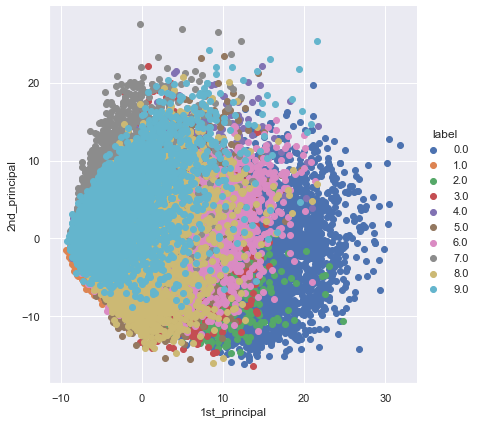

In [10]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, train_targets)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sns.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

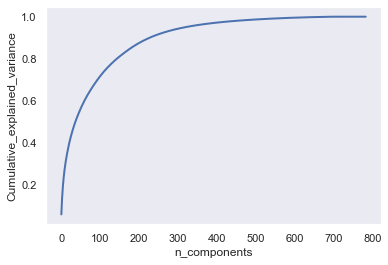

In [11]:
pca.n_components = 784
pca_data = pca.fit_transform(standardized_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

# If we take 200-dimensions, approx. 90% of variance is expalined

## TSNE using Sklearn

E:\anaconda\envs\py3.7-TF2.0\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


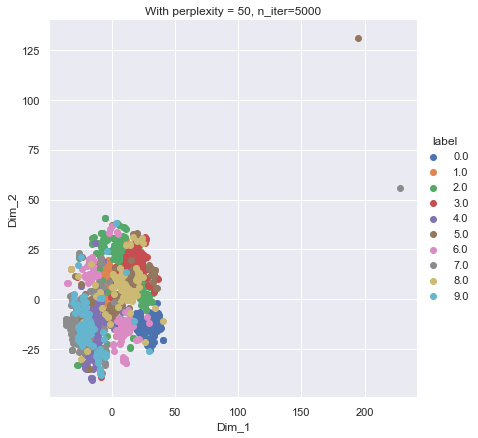

In [12]:
from sklearn.manifold import TSNE

# Picking the top 1000 points as TSNE takes a lot of time for 15K points
data_1000 = standardized_data[0:1000,:]
labels_1000 = train_targets[0:1000]

model = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=5000)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data_1000)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter=5000')
plt.show()

## Neural Network

In [13]:
import tensorflow as tf

In [14]:
train_df = np.load('TF_train.npz')
test_df = np.load('TF_test.npz')

In [15]:
mnist_train, mnist_targets = train_df['inputs'].astype(np.float), train_df['targets'].astype(np.int)
df_test = test_df["inputs"]

In [16]:
mnist_train.shape

(42000, 784)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(mnist_train, mnist_targets.T.reshape(-1,1),
                                                    test_size=0.1, random_state=1212)

In [19]:
print('X_train shape = ',X_train.shape)
print('X_test shape = ', X_test.shape)
print('y_train shape = ', y_train.shape)
print('y_test shape = ', y_test.shape)
print('df_test shape = ', df_test.shape)

X_train shape =  (37800, 784)
X_test shape =  (4200, 784)
y_train shape =  (37800, 1)
y_test shape =  (4200, 1)
df_test shape =  (28000, 784)


In [20]:
X_train = np.asmatrix(X_train).reshape(X_train.shape[0], X_train.shape[1]) #(33600, 784)
X_test = np.asmatrix(X_test).reshape(X_test.shape[0], X_test.shape[1])

X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')
df_test = df_test.astype('float32')

X_train = tf.keras.utils.normalize(X_train, axis=-1, order=2)
X_test = tf.keras.utils.normalize(X_test, axis=-1, order=2)
df_test = tf.keras.utils.normalize(df_test, axis=-1, order=2)

In [21]:
alpha = [0.001, 0.005, 0.01, 0.05, 0.1]

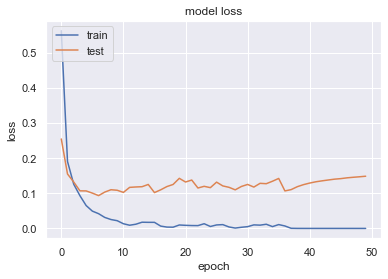

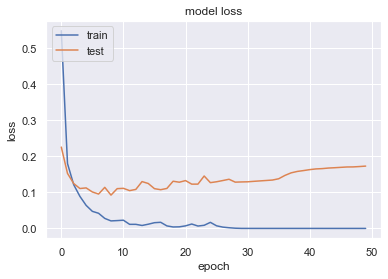

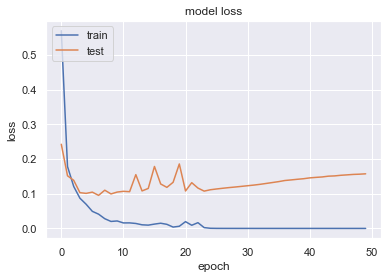

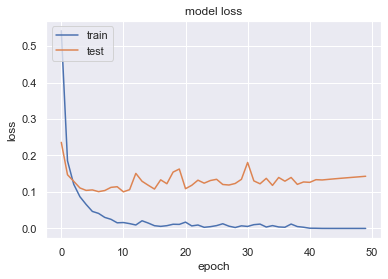

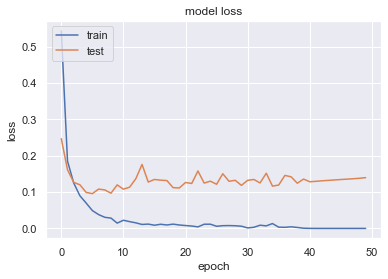

In [26]:
for lr in alpha:
    input_size = 784
    output_size = 10
    learning_rate = lr
    hidden_layer1 = 400
    hidden_layer2 = 300
    hidden_layer3 = 300
    hidden_layer4 = 200


    # define how the model will look like
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(input_size,)),
        tf.keras.layers.Dense(hidden_layer1, activation='relu'), 
        tf.keras.layers.Dense(hidden_layer2, activation='relu'), 
        tf.keras.layers.Dense(hidden_layer3, activation='relu'), 
        tf.keras.layers.Dense(hidden_layer4, activation='relu'),
        tf.keras.layers.Dense(output_size, activation='softmax') 
    ])

    Adam = tf.keras.optimizers.Adam(lr=learning_rate)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    NUM_EPOCHS = 50
    batch_size = 200
#     early_stopping = tf.keras.callbacks.EarlyStopping(patience=10)

    history = model.fit(X_train,
              y_train,
              batch_size=batch_size,
              epochs=NUM_EPOCHS,
              validation_split=0.2, verbose=0)

    # summarize history for accuracy
#     plt.plot(history.history['accuracy'])
#     plt.plot(history.history['val_accuracy'])
#     plt.title('model accuracy')
#     plt.ylabel('accuracy')
#     plt.xlabel('epoch')
#     plt.legend(['train', 'test'], loc='upper left')
#     plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [22]:
input_size = 784
output_size = 10
learning_rate = 0.1
hidden_layer1 = 500
hidden_layer2 = 400
hidden_layer3 = 300
hidden_layer4 = 200
hidden_layer5 = 100


# define how the model will look like
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(input_size,)),
    tf.keras.layers.Dense(hidden_layer1, activation='relu'), 
    tf.keras.layers.Dense(hidden_layer2, activation='relu'), 
    tf.keras.layers.Dense(hidden_layer3, activation='relu'), 
    tf.keras.layers.Dense(hidden_layer4, activation='relu'),
    tf.keras.layers.Dense(hidden_layer5, activation='relu'),
    tf.keras.layers.Dense(output_size, activation='softmax') 
])

Adam = tf.keras.optimizers.Adam(lr=learning_rate)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

NUM_EPOCHS = 100
batch_size = 300
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

model.fit(X_train,
          y_train,
          batch_size=batch_size,
          epochs=NUM_EPOCHS,
          callbacks=[early_stopping],
           validation_split=0.2, verbose=2)

Epoch 1/100
101/101 - 4s - loss: 0.6723 - accuracy: 0.7957 - val_loss: 0.2661 - val_accuracy: 0.9171
Epoch 2/100
101/101 - 3s - loss: 0.1954 - accuracy: 0.9411 - val_loss: 0.1758 - val_accuracy: 0.9443
Epoch 3/100
101/101 - 3s - loss: 0.1271 - accuracy: 0.9608 - val_loss: 0.1345 - val_accuracy: 0.9569
Epoch 4/100
101/101 - 3s - loss: 0.0904 - accuracy: 0.9724 - val_loss: 0.1023 - val_accuracy: 0.9680
Epoch 5/100
101/101 - 3s - loss: 0.0673 - accuracy: 0.9790 - val_loss: 0.1084 - val_accuracy: 0.9651
Epoch 6/100
101/101 - 4s - loss: 0.0503 - accuracy: 0.9848 - val_loss: 0.1149 - val_accuracy: 0.9657


In [23]:
input_size = 784
output_size = 10
learning_rate = 0.01
hidden_layer1 = 500
hidden_layer2 = 400
hidden_layer3 = 400
hidden_layer4 = 300
hidden_layer5 = 200
hidden_layer6 = 200
hidden_layer7 = 100


    
# define how the model will look like
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(input_size,)),
    tf.keras.layers.Dense(hidden_layer1, activation='relu'),
    tf.keras.layers.Dropout(.2, input_shape=(input_size,)),
    tf.keras.layers.Dense(hidden_layer2, activation='relu'),
#     tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001),
    tf.keras.layers.Dense(hidden_layer3, activation='relu'), 
    tf.keras.layers.Dense(hidden_layer4, activation='relu'),
    tf.keras.layers.Dense(hidden_layer5, activation='relu'),
    tf.keras.layers.Dense(hidden_layer6, activation='relu'),
    tf.keras.layers.Dense(hidden_layer7, activation='relu'),    
    tf.keras.layers.Dense(output_size, activation='softmax')])

Adam= tf.keras.optimizers.Adam(lr=learning_rate)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5)


NUM_EPOCHS = 100
batch_size = 300


model.fit(X_train,
          y_train,
          batch_size=batch_size,
          epochs=NUM_EPOCHS,
          callbacks=[early_stopping],
          validation_split=0.2, verbose=2)


Epoch 1/100
101/101 - 5s - loss: 0.6842 - accuracy: 0.7804 - val_loss: 0.3018 - val_accuracy: 0.9091
Epoch 2/100
101/101 - 5s - loss: 0.2044 - accuracy: 0.9379 - val_loss: 0.1455 - val_accuracy: 0.9541
Epoch 3/100
101/101 - 5s - loss: 0.1308 - accuracy: 0.9605 - val_loss: 0.1187 - val_accuracy: 0.9626
Epoch 4/100
101/101 - 5s - loss: 0.1006 - accuracy: 0.9686 - val_loss: 0.1025 - val_accuracy: 0.9675
Epoch 5/100
101/101 - 5s - loss: 0.0784 - accuracy: 0.9754 - val_loss: 0.1066 - val_accuracy: 0.9690
Epoch 6/100
101/101 - 5s - loss: 0.0626 - accuracy: 0.9802 - val_loss: 0.0875 - val_accuracy: 0.9733
Epoch 7/100
101/101 - 5s - loss: 0.0562 - accuracy: 0.9816 - val_loss: 0.1056 - val_accuracy: 0.9696
Epoch 8/100
101/101 - 5s - loss: 0.0514 - accuracy: 0.9832 - val_loss: 0.0908 - val_accuracy: 0.9728
Epoch 9/100
101/101 - 5s - loss: 0.0438 - accuracy: 0.9859 - val_loss: 0.1061 - val_accuracy: 0.9708
Epoch 10/100
101/101 - 5s - loss: 0.0344 - accuracy: 0.9887 - val_loss: 0.1102 - val_accura

In [24]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

132/132 [==============================] - 1s 6ms/step - loss: 0.0905 - accuracy: 0.9757


In [25]:
norm_test = tf.keras.utils.normalize(df_test, axis=-1, order=2)

In [27]:
test_pred = pd.DataFrame(model.predict(norm_test, batch_size=200))
test_pred = pd.DataFrame(test_pred.idxmax(axis = 1))
test_pred.index.name = 'ImageId'
test_pred = test_pred.rename(columns = {0: 'Label'}).reset_index()
test_pred['ImageId'] = test_pred['ImageId'] + 1

In [28]:
test_pred

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [29]:
test_pred.to_csv('sample_submission2.csv', index = False)